These are some tests with plotting images as csv back to images.

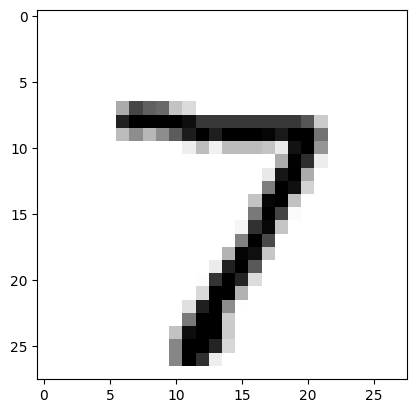

In [3]:
# ---- PLOT SINGLE NUMBER ----
import numpy as np
import matplotlib.pyplot as plt

f = open('../data/mnist_test_10.csv')
data = f.readlines()
f.close()

values = data[0].split(',')
# np.asfarray() is same as array() but automatically converts strings into numbers
# reshape tuple: [int(np.sqrt(len(values[1:])))] * 2
array = np.asfarray(values[1:]).reshape((28, 28))
# arrays can be done math operations with, which apply to every individual value in the array
array = array / 255 * 0.99 + 0.01
plt.imshow(array, cmap='gray_r', interpolation='None')
plt.show()

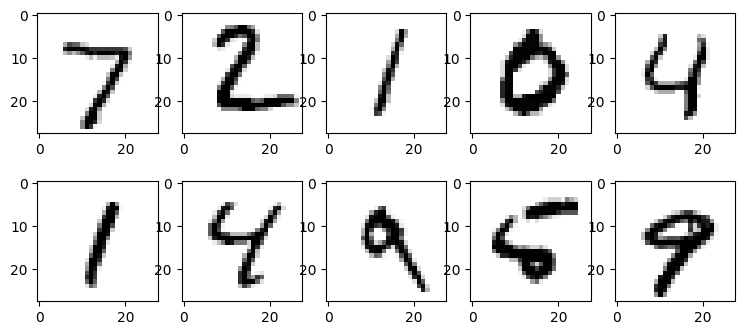

In [5]:
# ---- PLOT MULTIPLE NUMBERS ----
import matplotlib.pyplot as plt
import numpy as np
import csv

fig = plt.figure(figsize=(9, 4))
columns, rows = 5, 2

nlist = []
n = 0

with open('../data/mnist_test_10.csv') as f:
    reader = csv.reader(f)

    for row in reader:
        # matplotlib stuff
        n += 1
        fig.add_subplot(rows, columns, n)

        # will be turned into a numpy array
        vals = []

        # checks if it's the first item so <if> only iterates once,
        # to do calculations without opening file again or being destructive
        if reader.line_num == 1:
            # checks how many items the row has (skipping 1st, which is assigned number for the data)
            # items correspond to pixels
            area = len(row) - 1
            # it's a square 2D image, so we can determine width and height using square root
            size = int((np.sqrt(area)))

        number = row[0]
        for column in row[1:]:
            # basically just reads from csv and appends to vals
            vals.append(float(column))

        vals = np.array(vals)
        vals = np.reshape(vals, [size, size])
        plt.imshow(vals, cmap='gray_r')

    f.close()

plt.show()